In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/vwce_operations.csv")
df.head()


,date,contribution_eur,shares,unit_price_eur,fee_eur,time
0,2025-07-28,40,0.290395,134.30,1,03:00
1,2025-07-31,100,0.721680,137.18,1,03:00
2,2025-08-11,400,2.961259,137.74,1,03:34
3,2025-08-11,400,2.959502,134.82,1,07:33
4,2025-08-28,500,3.652467,136.62,1,10:38


In [ ]:
import pandas as pd

df = pd.read_csv("/content/vwce_operations.csv")
print("Colunas encontradas:")
print(list(df.columns))

print("\nPrimeiras linhas:")
display(df.head())


Colunas encontradas:
['date', 'contribution_eur', 'shares', 'unit_price_eur', 'fee_eur', 'time']

Primeiras linhas:


,date,contribution_eur,shares,unit_price_eur,fee_eur,time
0,2025-07-28,40,0.290395,134.30,1,03:00
1,2025-07-31,100,0.721680,137.18,1,03:00
2,2025-08-11,400,2.961259,137.74,1,03:34
3,2025-08-11,400,2.959502,134.82,1,07:33
4,2025-08-28,500,3.652467,136.62,1,10:38


In [ ]:
import re


df.columns = [c.strip() for c in df.columns]


aliases = {
    "data": ["data", "date", "Data", "DATA"],
    "aporte_eur": ["aporte", "aporte_eur", "contribution", "contribution_eur", "aportes", "valor", "amount"],
    "shares": ["shares", "cotas", "numero de cotas", "numero_de_cotas", "n_cotas", "qty", "quantity"],
    "preco_unitario": ["preço unitario", "preco unitario", "preco_unitario", "unit_price", "price", "preco", "valor_unitario"],
    "taxa_eur": ["taxa", "taxa_eur", "fee", "fees", "custo", "commission"],
}


def find_col(possibles, columns):
    cols_lower = {c.lower(): c for c in columns}
    for p in possibles:
        p = p.lower().strip()
        if p in cols_lower:
            return cols_lower[p]

    for c in columns:
        cl = c.lower()
        for p in possibles:
            pl = p.lower().replace(" ", "_")
            if pl in cl.replace(" ", "_"):
                return c
    return None


rename_map = {}
for target, poss in aliases.items():
    found = find_col(poss, df.columns)
    if found:
        rename_map[found] = target

print("Mapeamento detectado:")
print(rename_map)

df = df.rename(columns=rename_map)


required = ["data", "aporte_eur", "shares", "preco_unitario", "taxa_eur"]
missing = [c for c in required if c not in df.columns]
print("Faltando:", missing)

display(df.head())


Mapeamento detectado:
{'data': 'data', 'aporte_eur': 'aporte_eur', 'shares': 'shares', 'preco_unitario': 'preco_unitario', 'taxa_eur': 'taxa_eur'}
Faltando: []


,data,aporte_eur,shares,preco_unitario,taxa_eur,time
0,2025-07-28,40,0.290395,134.30,1,03:00
1,2025-07-31,100,0.721680,137.18,1,03:00
2,2025-08-11,400,2.961259,137.74,1,03:34
3,2025-08-11,400,2.959502,134.82,1,07:33
4,2025-08-28,500,3.652467,136.62,1,10:38


In [ ]:
import matplotlib.pyplot as plt

df = df.sort_values("data")

df["investido_liquido"] = df["aporte_eur"] - df["taxa_eur"]
df["investido_liquido_acum"] = df["investido_liquido"].cumsum()
df["shares_acum"] = df["shares"].cumsum()
df["preco_medio_acum"] = df["investido_liquido_acum"] / df["shares_acum"]

display(df[["data","aporte_eur","shares","preco_unitario","taxa_eur","preco_medio_acum"]])


,data,aporte_eur,shares,preco_unitario,taxa_eur,preco_medio_acum
0,2025-07-28,40,0.290395,134.30,1,134.300004
1,2025-07-31,100,0.721680,137.18,1,136.353643
2,2025-08-11,400,2.961259,137.74,1,135.151022
3,2025-08-11,400,2.959502,134.82,1,135.009715
4,2025-08-28,500,3.652467,136.62,1,135.565345
5,2025-08-28,60,0.431981,136.58,1,135.605129
6,2025-10-30,500,3.425316,145.68,1,137.994562


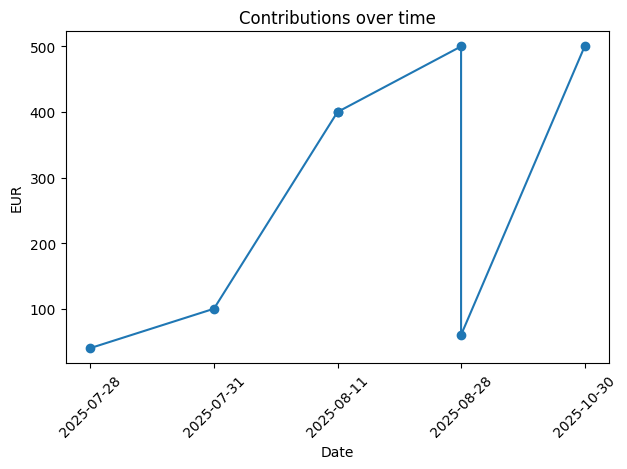

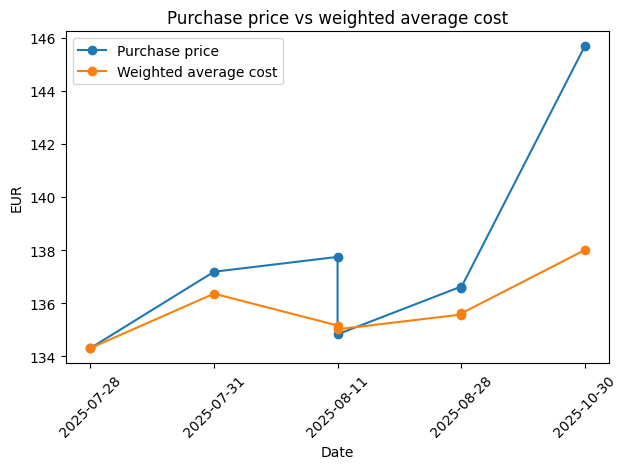

In [ ]:
# Gráfico 1
plt.figure()
plt.plot(df["data"], df["aporte_eur"], marker="o")
plt.title("Contributions over time")
plt.xlabel("Date")
plt.ylabel("EUR")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("contributions_over_time.png", bbox_inches="tight")
plt.show()

# Gráfico 2
plt.figure()
plt.plot(df["data"], df["preco_unitario"], marker="o", label="Purchase price")
plt.plot(df["data"], df["preco_medio_acum"], marker="o", label="Weighted average cost")
plt.title("Purchase price vs weighted average cost")
plt.xlabel("Date")
plt.ylabel("EUR")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("purchase_price_vs_average_cost.png", bbox_inches="tight")
plt.show()
